In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
#from mpl_toolkits.basemap import Basemap
#import matplotlib.toolkits.basemap as basemap
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
df = pd.read_csv("worldometer_coronavirus_daily_data.csv")
sum_df = pd.read_csv("worldometer_coronavirus_summary_data.csv")

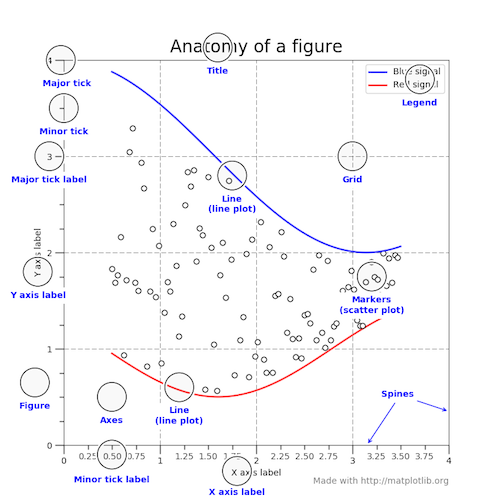

# Summary

In [3]:
df.shape

(184787, 7)

In [4]:
sum_df.shape

(226, 12)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

In [11]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,quarter,month,weekday
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,1,2,5
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN,1,2,6
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN,1,2,0
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN,1,2,1
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN,1,2,2


In [12]:
df['date'].max()

Timestamp('2022-05-14 00:00:00')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     184787 non-null  datetime64[ns]
 1   country                  184787 non-null  object        
 2   cumulative_total_cases   184787 non-null  float64       
 3   daily_new_cases          174329 non-null  float64       
 4   active_cases             166747 non-null  float64       
 5   cumulative_total_deaths  178227 non-null  float64       
 6   daily_new_deaths         157850 non-null  float64       
 7   quarter                  184787 non-null  int32         
 8   month                    184787 non-null  int32         
 9   weekday                  184787 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 12.0+ MB


In [7]:
df.fillna(0, inplace = True)
sum_df.fillna(0, inplace = True)

In [8]:
sum_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,0.0,2853,55.0,1499795.0,43136.0,34769277


In [9]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    226 non-null    float64
 4   total_recovered                 226 non-null    float64
 5   active_cases                    226 non-null    float64
 6   serious_or_critical             226 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  226 non-null    float64
 9   total_tests                     226 non-null    float64
 10  total_tests_per_1m_population   226 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

# Plots

In [10]:
quarter_cases = df.groupby('quarter')['active_cases'].sum().reset_index()
quarter_cases.head()

,quarter,active_cases
0,1,4.798066e+09
1,2,1.948744e+09
2,3,1.519095e+09
3,4,2.137912e+09


<BarContainer object of 4 artists>

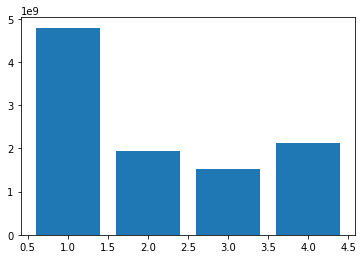

In [11]:
#initiate fig if you want to save image
fig = plt.figure()
plt.bar(quarter_cases['quarter'], quarter_cases['active_cases'])

In [55]:
fig.savefig('my_figure.png')

In [56]:
!ls -lh my_figure.png

-rw-r--r--  1 kensaroven  staff   3.6K 26 Jun 00:44 my_figure.png


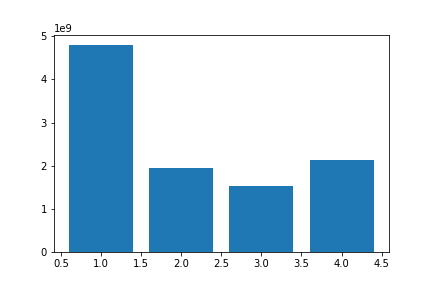

In [9]:
#Dsiplay saved files
from IPython.display import Image
Image('my_figure.png')

In [58]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

In [12]:
death_details = df.groupby('month')['daily_new_deaths'].sum().reset_index()
death_details.head()

new_case_details = df.groupby('month')['daily_new_cases'].sum().reset_index()
new_case_details.head()

,month,daily_new_cases
0,1,109494568.0
1,2,69274443.0
2,3,65416913.0
3,4,49712080.0
4,5,30216742.0


### 1. Subplots

#### MATLAB style

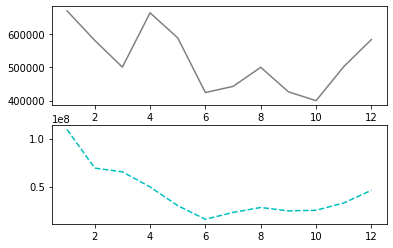

In [13]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(death_details['month'], death_details['daily_new_deaths'],color='gray', linestyle = 'solid') #'-'

plt.subplot(2,1,2)
plt.plot(new_case_details['month'], new_case_details['daily_new_cases'],color='c', linestyle = 'dashed') #'--'
# color codes = 'rgbcmyk'

#### OO interface

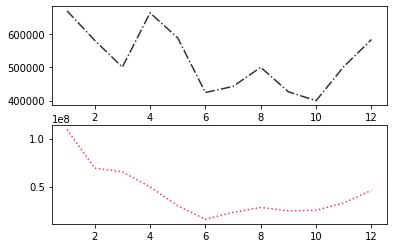

In [14]:
fig, ax = plt.subplots(2)
ax[0].plot(death_details['month'], death_details['daily_new_deaths'], color='0.2', linestyle = 'dashdot') #'-.'
# grayscale between 0 and 1
ax[1].plot(new_case_details['month'], new_case_details['daily_new_cases'],color=(1.0,0.2,0.3), linestyle='dotted') #':'
# RGB scale specification

# In addition also specify using hex code and html color codes

In [15]:
cont_case = sum_df.groupby('continent').agg({
    'total_cases_per_1m_population':'sum', 
    'total_tests_per_1m_population':'sum',
}).reset_index()
cont_case.head(10)

,continent,total_cases_per_1m_population,total_tests_per_1m_population
0,Africa,1894093,10540422.0
1,Asia,5316204,81570774.0
2,Australia/Oceania,1862950,15975715.0
3,Europe,15377171,201007918.0
4,North America,7011745,90468341.0
5,South America,2021276,12702585.0


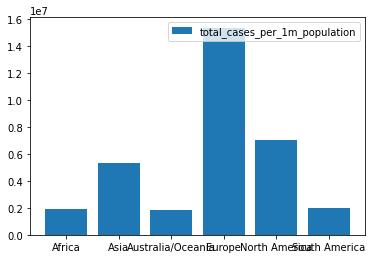

In [16]:
plt.bar(cont_case['continent'], cont_case['total_cases_per_1m_population'], label='total_cases_per_1m_population')
plt.axis('tight')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


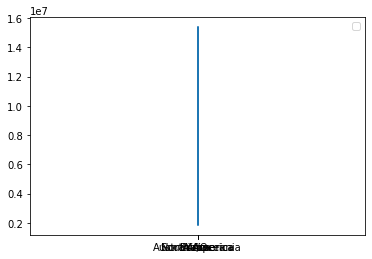

In [17]:
plt.plot(cont_case['continent'], cont_case['total_cases_per_1m_population'])
plt.axis('equal')
plt.legend()

plt.xlabel() → ax.set_xlabel()

plt.ylabel() → ax.set_ylabel()

plt.xlim() → ax.set_xlim()

plt.ylim() → ax.set_ylim()

plt.title() → ax.set_title()

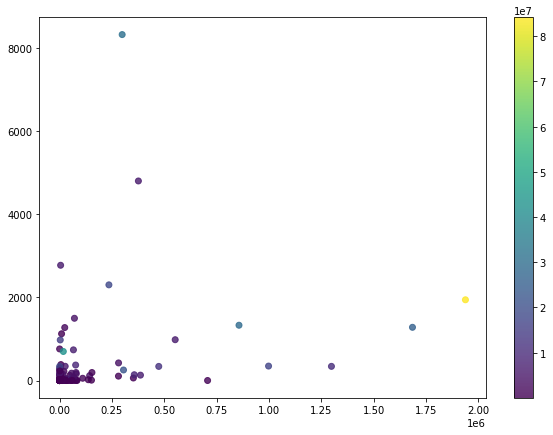

In [18]:
plt.figure(figsize = (10,7))
plt.scatter(sum_df['active_cases'], sum_df['serious_or_critical'], c = sum_df.total_confirmed,
            alpha=0.8, cmap = 'viridis')
#alpha to adjust transparency
plt.colorbar();

#### Errorbar

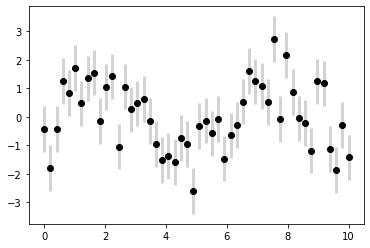

In [19]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=3, capsize=0);

### 2.Histogram

(array([74., 19., 15., 14., 13., 11.,  7., 15.,  4., 11.,  8.,  4.,  5.,
         6.,  6.,  1.,  3.,  2.,  1.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([   0. ,  209.9,  419.8,  629.7,  839.6, 1049.5, 1259.4, 1469.3,
        1679.2, 1889.1, 2099. , 2308.9, 2518.8, 2728.7, 2938.6, 3148.5,
        3358.4, 3568.3, 3778.2, 3988.1, 4198. , 4407.9, 4617.8, 4827.7,
        5037.6, 5247.5, 5457.4, 5667.3, 5877.2, 6087.1, 6297. ]),
 [<matplotlib.patches.Polygon at 0x7f8ee0066a30>])

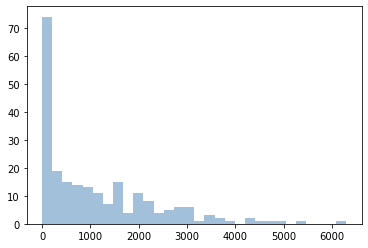

In [16]:
plt.hist(sum_df['total_deaths_per_1m_population'], bins=30, alpha=0.5,
                histtype='stepfilled', color='steelblue',
                edgecolor='none')

(array([ 1.,  0.,  2.,  5.,  5.,  8., 10., 18., 10., 23., 22., 24., 43.,
        40., 49., 60., 60., 56., 59., 42., 49., 70., 54., 51., 45., 33.,
        38., 31., 18., 18., 25.,  9.,  9.,  3.,  2.,  3.,  4.,  0.,  0.,
         1.]),
 array([-2.78430713, -2.48453287, -2.18475861, -1.88498435, -1.58521009,
        -1.28543583, -0.98566157, -0.68588731, -0.38611305, -0.08633879,
         0.21343547,  0.51320973,  0.81298399,  1.11275825,  1.41253251,
         1.71230677,  2.01208103,  2.31185529,  2.61162955,  2.91140381,
         3.21117807,  3.51095233,  3.81072659,  4.11050085,  4.41027511,
         4.71004937,  5.00982363,  5.30959789,  5.60937215,  5.90914641,
         6.20892067,  6.50869493,  6.80846919,  7.10824345,  7.40801771,
         7.70779197,  8.00756623,  8.30734049,  8.60711475,  8.90688901,
         9.20666327]),
 [<matplotlib.patches.Polygon at 0x7fbea37bd520>])

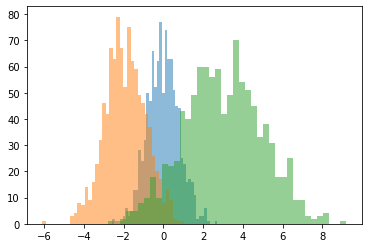

In [25]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,
          0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,
          0.,  1.,  0.,  0.,  1.,  1

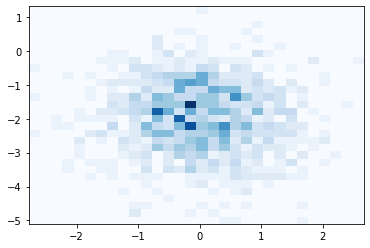

In [147]:
plt.hist2d(x1, x2, bins=30, cmap='Blues')

#### Add legend artist

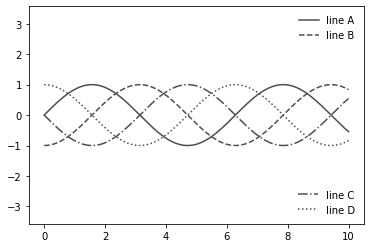

In [18]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                    styles[i], color='0.3')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc='lower right', frameon=False)
ax.add_artist(leg);

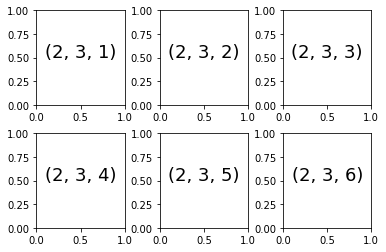

In [19]:
# Subplot 1 way
fig = plt.figure()
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
          fontsize=18, ha='center')

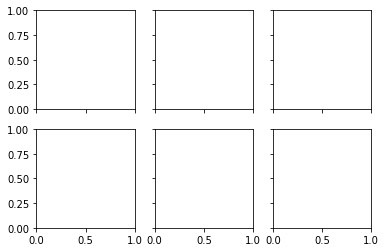

In [157]:
# Subplot 2 way
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

<Axes: >

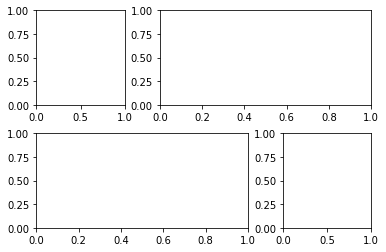

In [20]:
# Adjust the lenghts

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [21]:
new_case_mean = df.groupby('month')['daily_new_cases'].mean()
new_case_std = df.groupby('month')['daily_new_cases'].std()
new_death_mean = df.groupby('month')['daily_new_deaths'].mean()
new_death_std = df.groupby('month')['daily_new_deaths'].std()

In [ ]:
#births.pivot_table('births',[births.index.month, births.index.day])

In [22]:
new_case1 = pd.merge(new_case_mean, new_case_std, on = 'month', how = 'left')
new_case2 = pd.merge(new_case1, new_death_mean, on = 'month', how = 'left')
new_case3 = pd.merge(new_case2, new_death_std, on = 'month', how = 'left').reset_index()
new_case3.columns = ['month','new_case_mean', 'new_case_std', 'new_death_mean', 'new_death_std']
new_case3.head(15)

,month,new_case_mean,new_case_std,new_death_mean,new_death_std
0,1,7826.071617,41442.442824,47.922665,226.947325
1,2,4325.057314,18694.524572,36.314229,173.872385
2,3,3121.631657,18743.249614,23.906566,125.479913
3,4,2451.285996,14750.084671,32.768442,179.454581
4,5,1765.615403,14130.818749,34.423338,228.317464
5,6,1183.876889,5972.463996,31.436148,163.694524
6,7,1661.533835,6689.019734,31.748674,137.262145
7,8,2025.933367,9144.725879,35.855198,146.718063
8,9,1830.492535,8989.660107,31.531486,142.829952
9,10,1813.935126,7119.394872,28.596452,120.335680


Text(12, 28, 'year end')

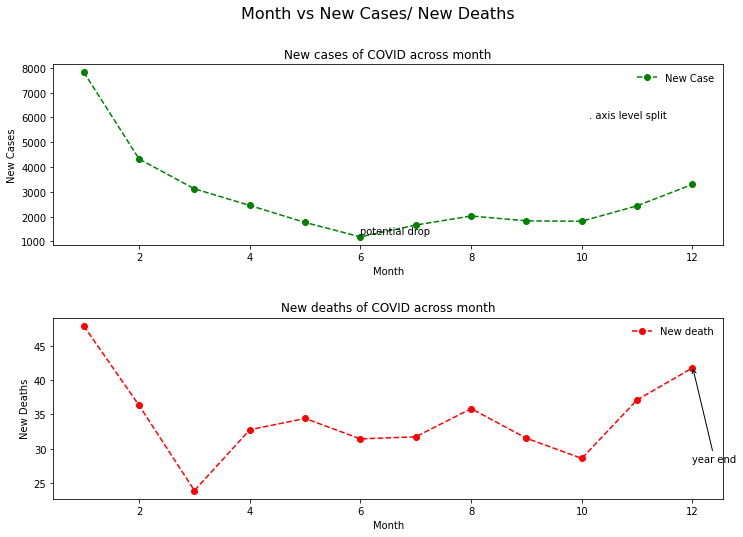

In [23]:
fig, ax = plt.subplots(2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Month vs New Cases/ New Deaths", fontsize = 16)
ax[0].plot(new_case3['month'], new_case3['new_case_mean'], linestyle = '--', marker = 'o', c = 'g', label = 'New Case')
ax[1].plot(new_case3['month'], new_case3['new_death_mean'], linestyle = '--', marker = 'o', c = 'r', label = 'New death')
ax[0].set_xlabel('Month')
ax[1].set_xlabel('Month')
ax[0].set_title('New cases of COVID across month')
ax[1].set_title('New deaths of COVID across month')
ax[0].set_ylabel('New Cases')
ax[1].set_ylabel('New Deaths')
ax[0].legend(frameon = False)
ax[1].legend(frameon = False)
ax[0].text(6, 1300, 'potential drop', transform=ax[0].transData) # text using data point specification
ax[0].text(0.8, 0.7, '. axis level split', transform=ax[0].transAxes) # text using axis level split
ax[0].text(0.3,0.3, 'figure proportion split', transform=fig.transFigure) # text using proportion of the figure
ax[1].annotate('year end', xy=(12,42), xytext=(12,28),
                   arrowprops=dict(arrowstyle="->")) # annotation to provide arrows

# If you want to include legend specify label in the plot code

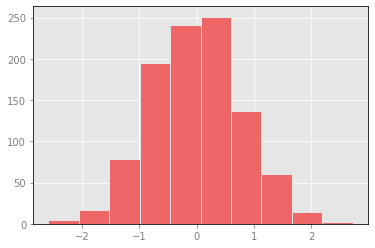

In [26]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
# for spine in ax.spines.values():
#     spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x1, edgecolor='#E6E6E6', color='#EE6666');

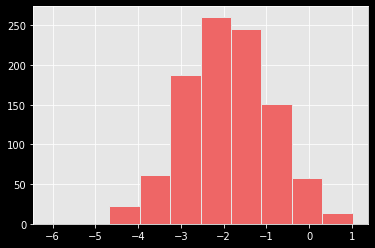

In [27]:
with plt.style.context('dark_background'):
    ax = plt.axes(facecolor='0.9')
    ax.set_axisbelow(True)
    plt.grid(color='w', linestyle='solid')
    ax.hist(x2,edgecolor='#E6E6E6', color='#EE6666')

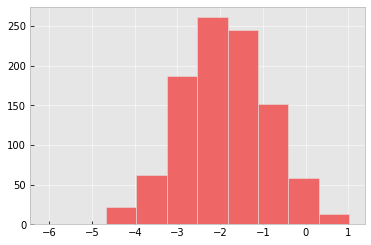

In [28]:
with plt.style.context('bmh'):
    ax = plt.axes(facecolor='0.9')
    ax.set_axisbelow(True)
    plt.grid(color='w', linestyle='solid')
    ax.hist(x2,edgecolor='#E6E6E6', color='#EE6666')

### Matplot 3D

In [30]:
from mpl_toolkits import mplot3d

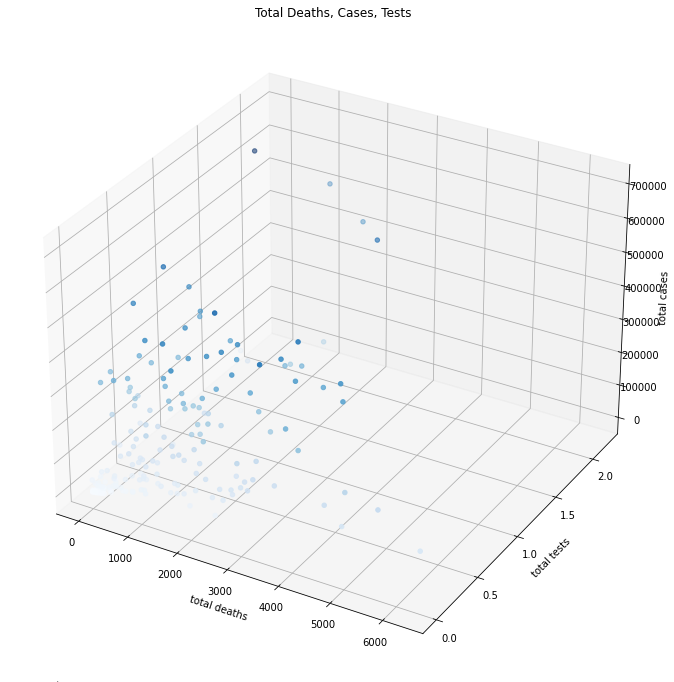

In [29]:
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')
zdata = sum_df['total_cases_per_1m_population']
xdata = sum_df['total_deaths_per_1m_population']
ydata = sum_df['total_tests_per_1m_population']
#ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');
ax.set_xlabel('total deaths')
ax.set_ylabel('total tests')
ax.set_zlabel('total cases')
ax.set_title('Total Deaths, Cases, Tests');

#### Seaborn

In [31]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.shape

(2000, 2)

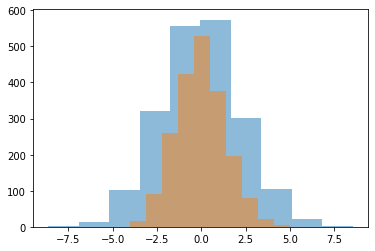

In [32]:
# normal hist
for col in 'xy':
    plt.hist(data[col], alpha=0.5)

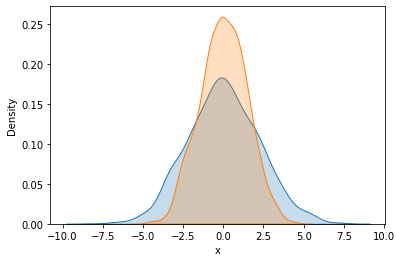

In [46]:
#kde plot
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='y', ylabel='Density'>

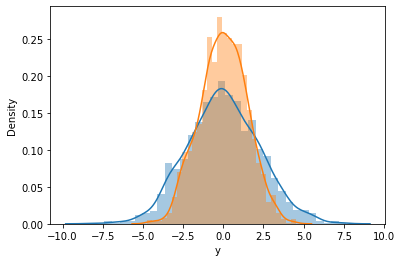

In [47]:
sns.distplot(data['x'])
sns.distplot(data['y'])

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


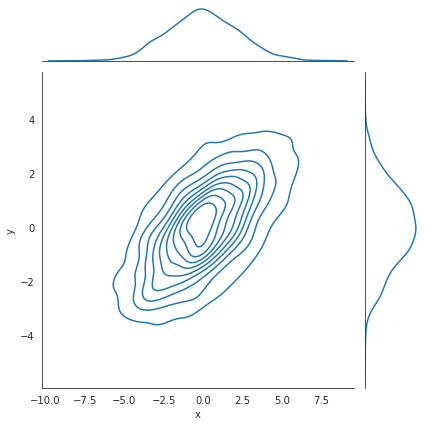

In [49]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


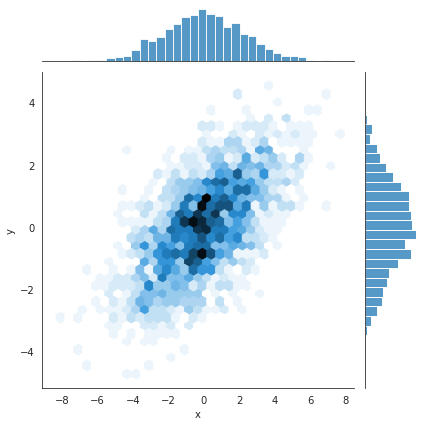

In [50]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex');

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


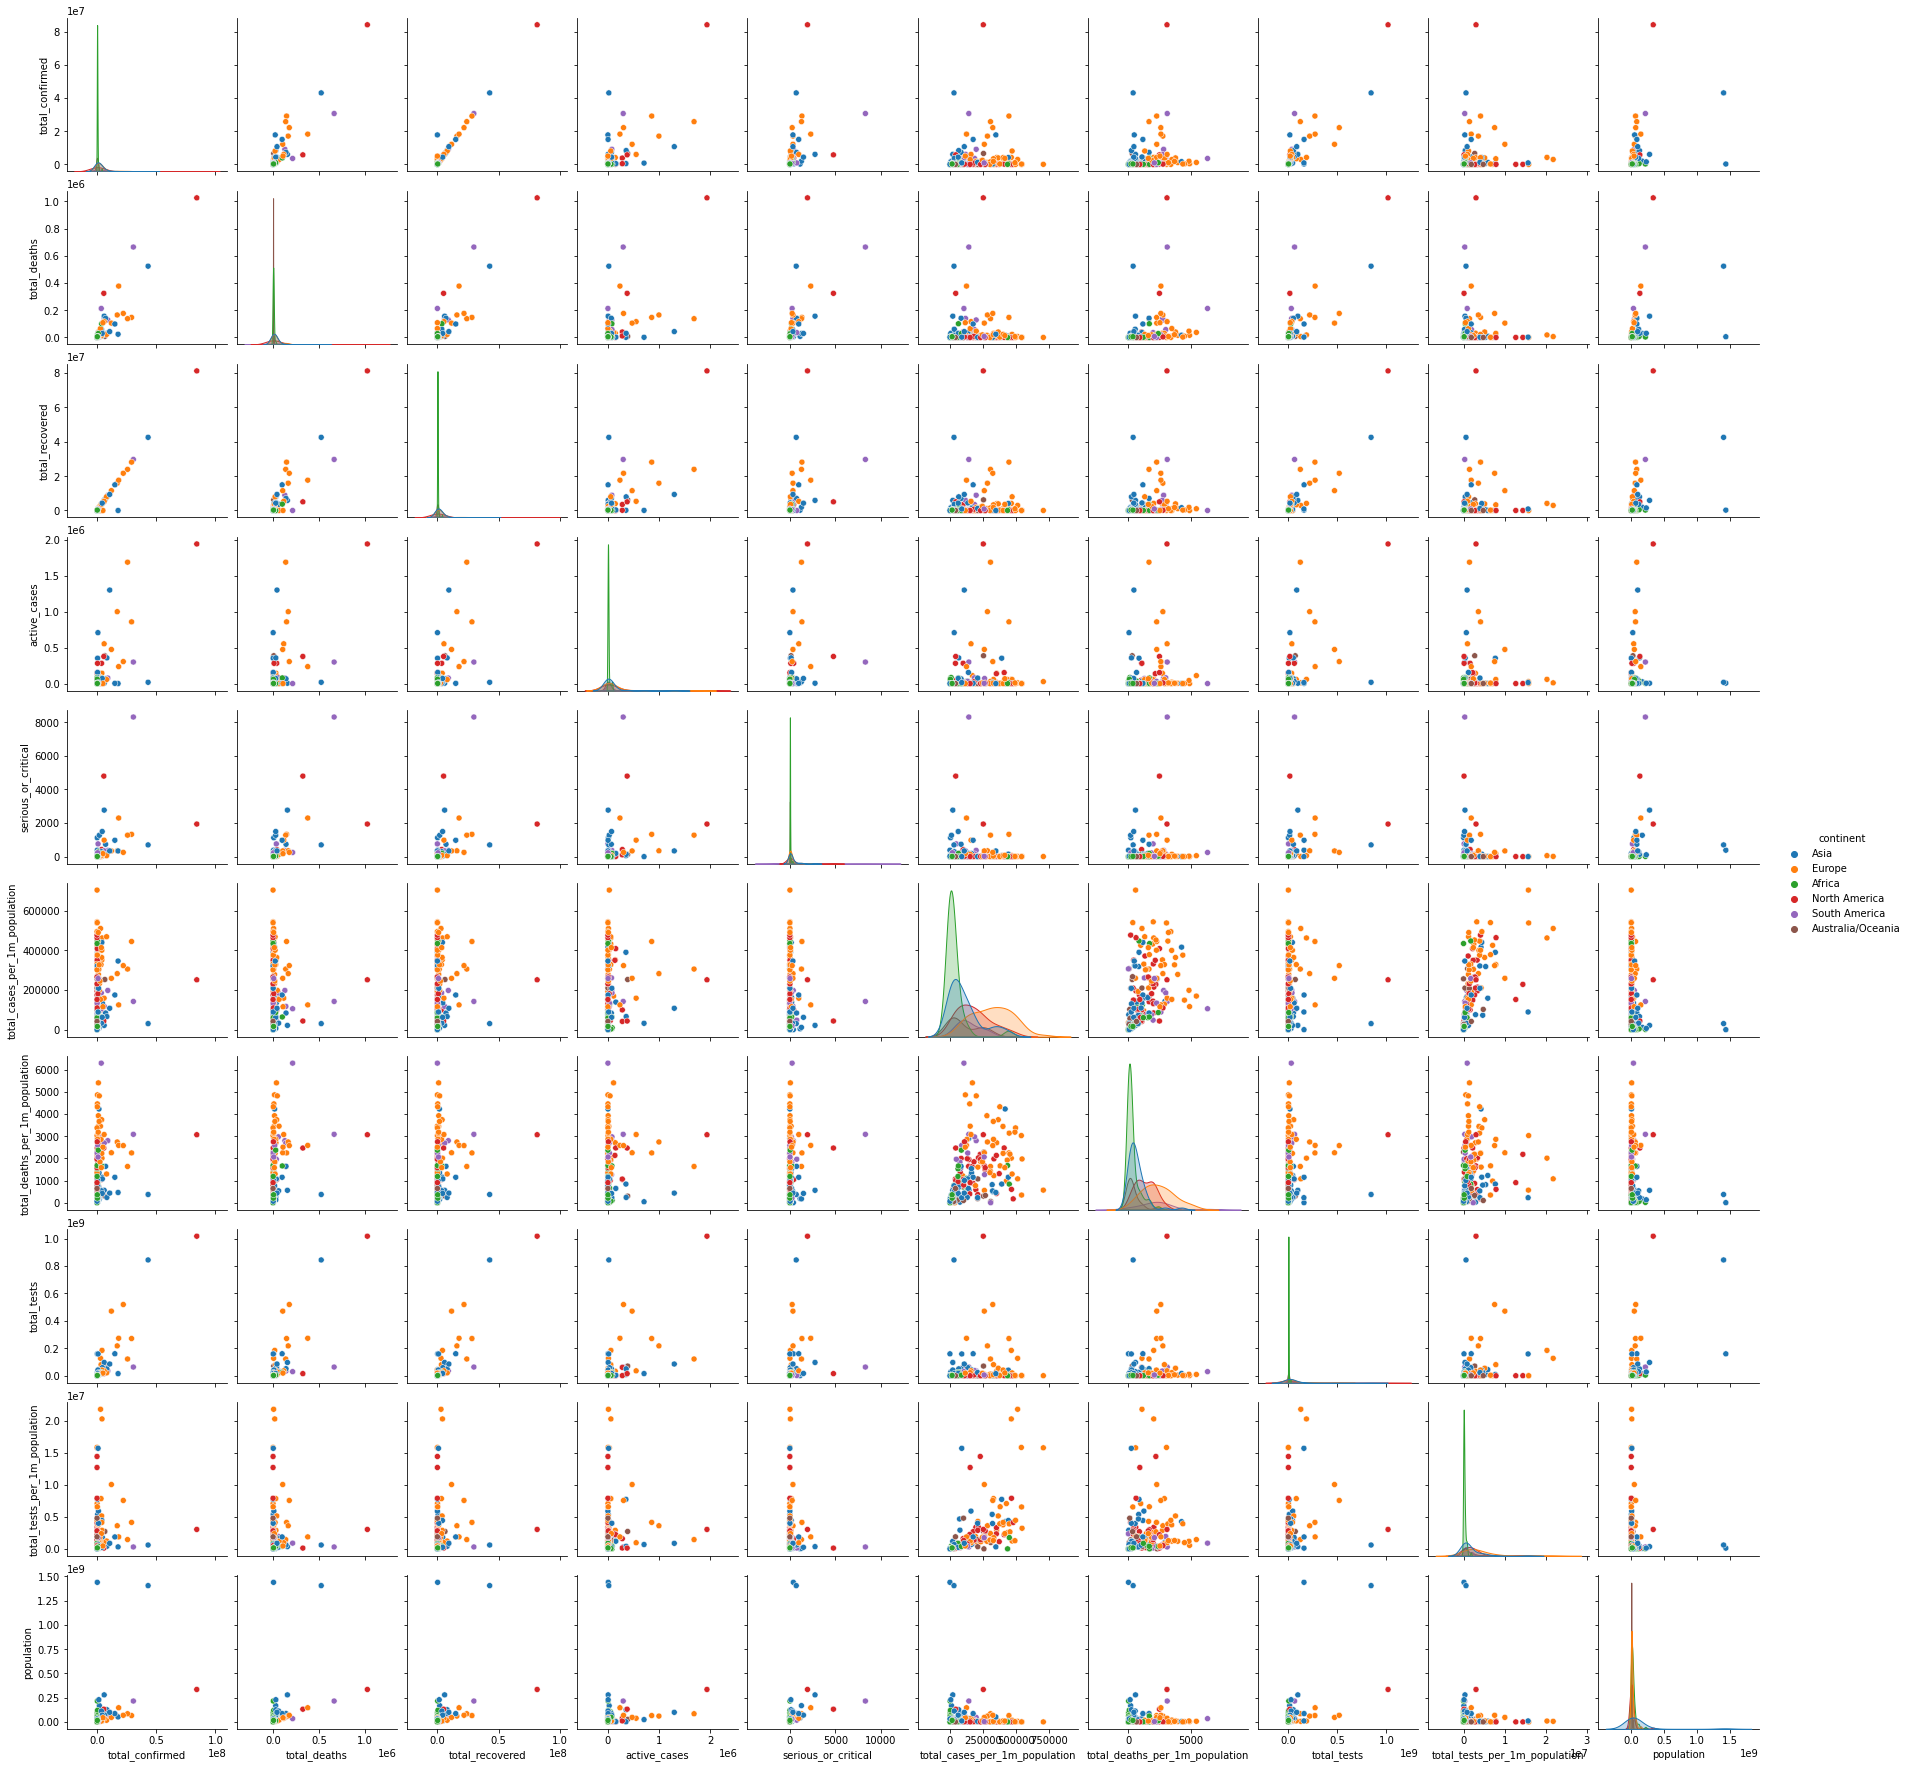

In [51]:
sns.pairplot(sum_df, hue='continent', size=2.5);

#### Catplot

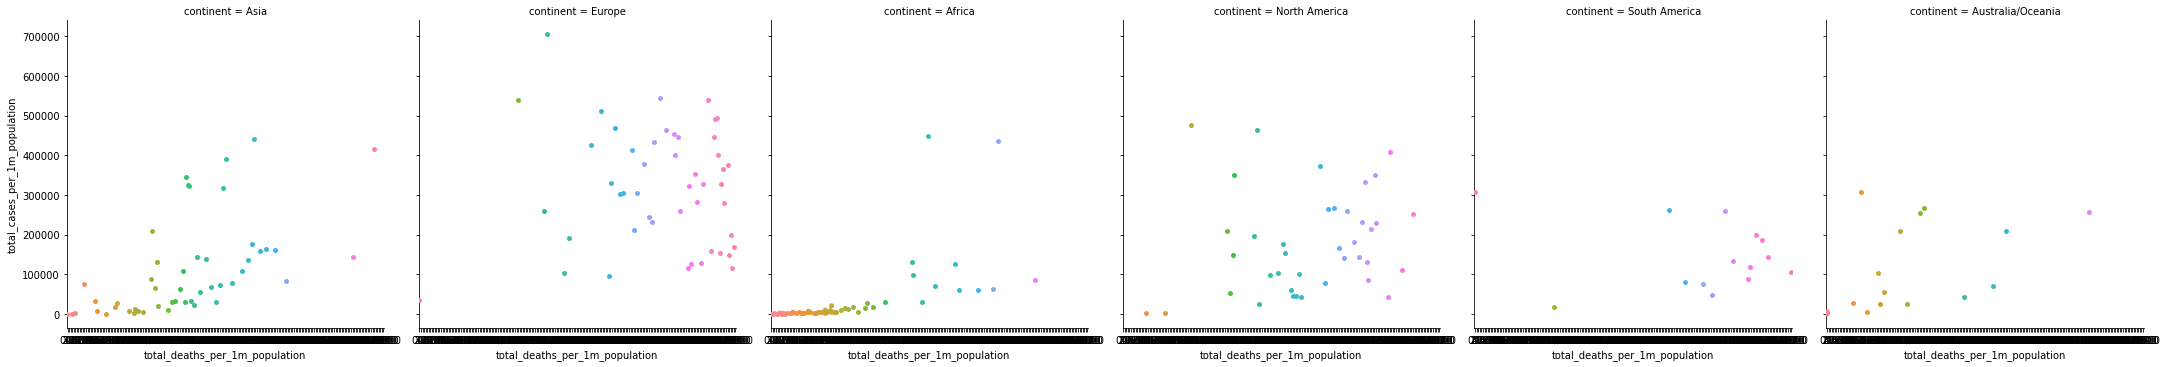

In [67]:
#df['death_pct'] = 100 * df['daily_new_deaths'] / df['daily_new_cases']
#df.fillna(0, inplace = True)
sns.catplot(data = sum_df, x="total_deaths_per_1m_population", y="total_cases_per_1m_population", col = 'continent')

#### Factor plot

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


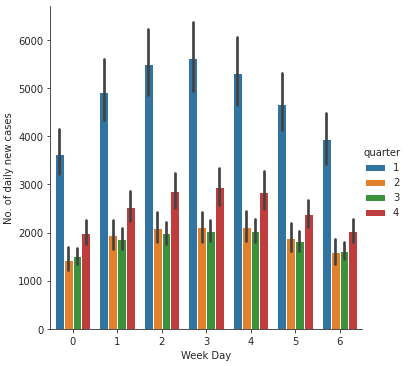

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("weekday", "daily_new_cases", "quarter", data=df, kind="bar")
    g.set_axis_labels("Week Day", "No. of daily new cases");

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


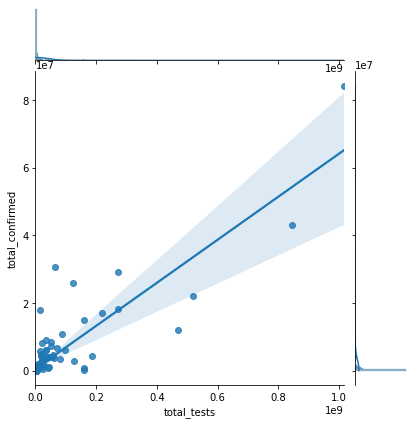

In [34]:
sns.jointplot("total_tests", "total_confirmed", data=sum_df, kind='reg');

#### Axvline

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


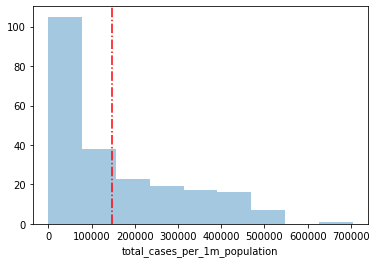

In [35]:
sns.distplot(sum_df['total_cases_per_1m_population'], kde=False);
plt.axvline(sum_df['total_cases_per_1m_population'].mean(), color="r", linestyle="-.");

#### lmplot

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'iteritems'

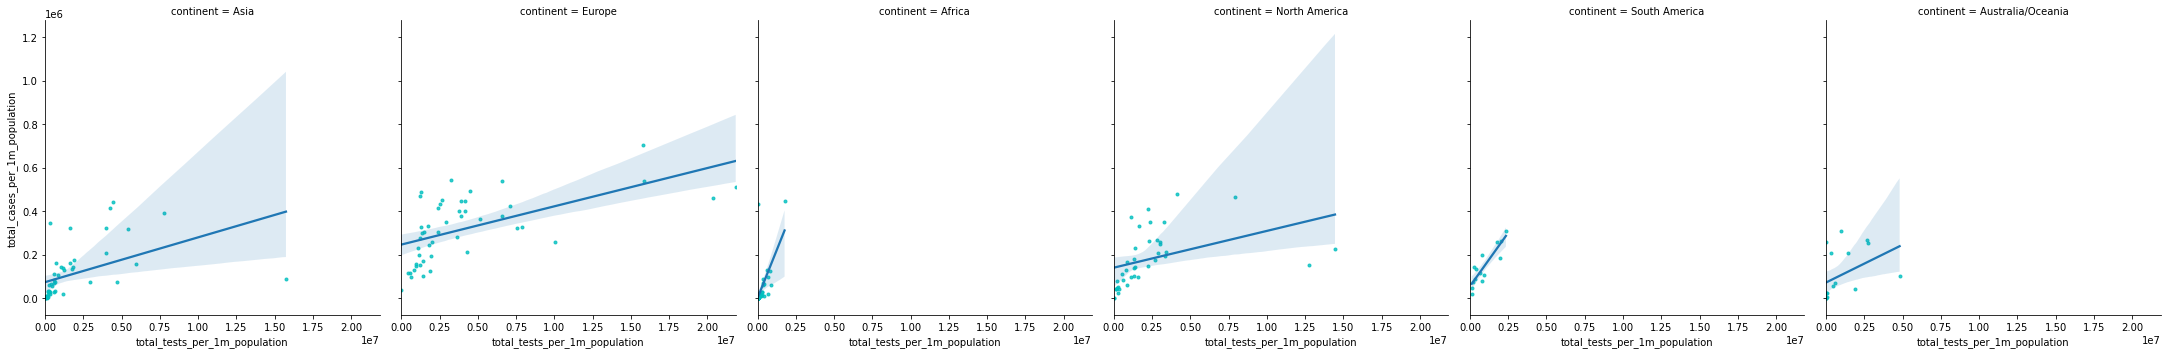

In [36]:
g = sns.lmplot('total_tests_per_1m_population', 'total_cases_per_1m_population', col='continent', data=sum_df,
                       markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

#### Plot labels

In [37]:
act_cont = sum_df.groupby('continent')['active_cases'].sum().reset_index()
act_cont

,continent,active_cases
0,Africa,497766.0
1,Asia,3260318.0
2,Australia/Oceania,455469.0
3,Europe,5841832.0
4,North America,3329149.0
5,South America,611966.0


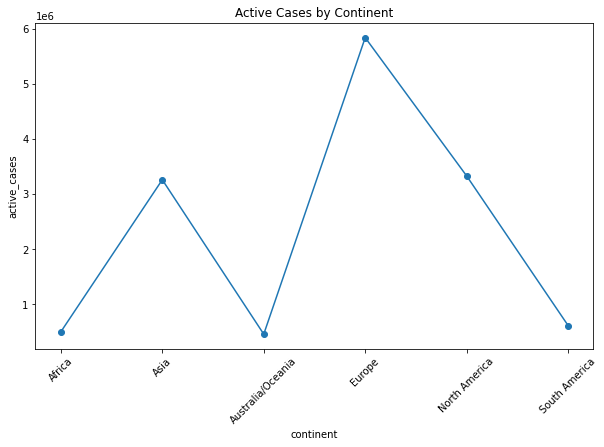

In [38]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(act_cont['continent'], 
        act_cont['active_cases'],
       marker = 'o')

# Set plot title and axes labels
ax.set(title = "Active Cases by Continent",
       xlabel = "continent",
       ylabel = "active_cases")

plt.setp(ax.get_xticklabels(), rotation = 45) # get x labels

plt.show()

In [41]:
new_case3.head()

,month,new_case_mean,new_case_std,new_death_mean,new_death_std
0,1,7826.071617,41442.442824,47.922665,226.947325
1,2,4325.057314,18694.524572,36.314229,173.872385
2,3,3121.631657,18743.249614,23.906566,125.479913
3,4,2451.285996,14750.084671,32.768442,179.454581
4,5,1765.615403,14130.818749,34.423338,228.317464


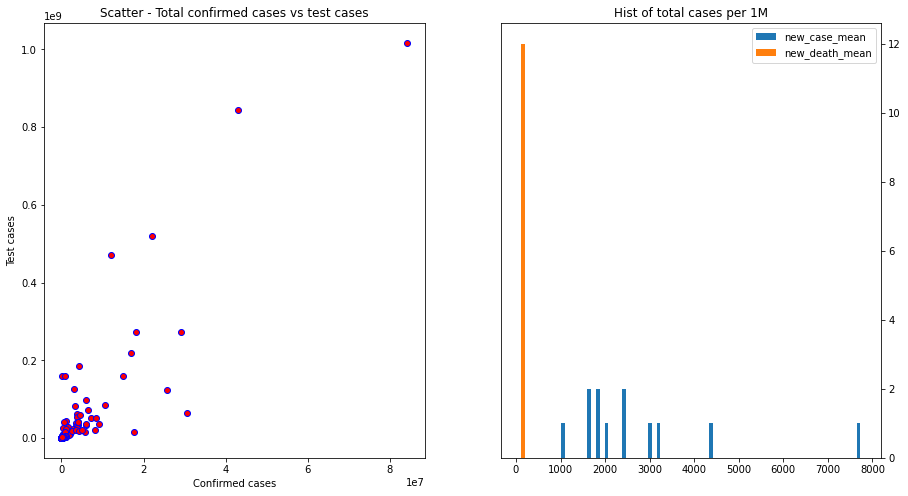

In [53]:
fig, ax = plt.subplots(1,2, figsize = (15, 8))

ax[0].scatter(x = sum_df['total_confirmed'], y=sum_df['total_tests'], marker = 'o', c = 'r', edgecolor = 'b')
ax[0].set(title = 'Scatter - Total confirmed cases vs test cases', xlabel = 'Confirmed cases', ylabel = 'Test cases')

ax[1].hist(new_case3[['new_case_mean', 'new_death_mean']], bins = 40, label = ['new_case_mean', 'new_death_mean'])
ax[1].set(title = 'Hist of total cases per 1M')
ax[1].legend(frameon = True)
ax[1].yaxis.tick_right()

<BarContainer object of 12 artists>

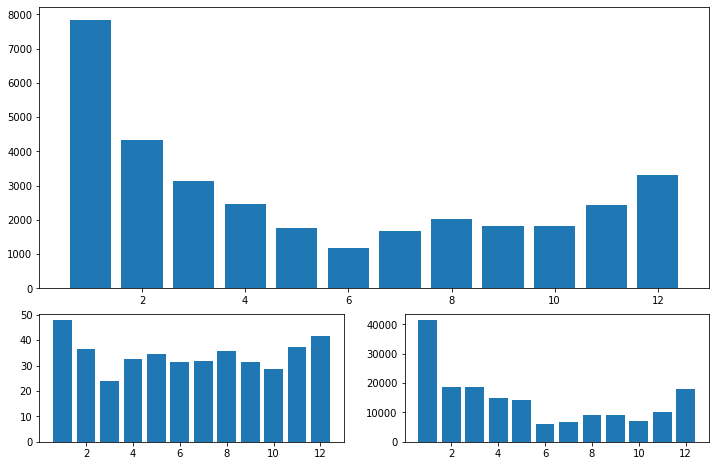

In [56]:
# grid specification
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax1.bar(new_case3['month'], new_case3['new_case_mean'])
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax2.bar(new_case3['month'], new_case3['new_death_mean'])
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax3.bar(new_case3['month'], new_case3['new_case_std'])

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

#### Axis bar labels

In [101]:
act_cont2 = sum_df.groupby('continent')[['total_confirmed', 'total_recovered']].sum().reset_index()
act_cont2

,continent,total_confirmed,total_recovered
0,Africa,12042400,10137200.0
1,Asia,149999659,126145273.0
2,Australia/Oceania,7942867,7403813.0
3,Europe,194330079,170861871.0
4,North America,99625662,94818163.0
5,South America,57136485,51031313.0


- container - Container with all the bars and returned from bar or barh plots
- labels - list of labels that needs to be displayed on the bar
- fmt - format string for the label
- label_type - Either edge or center
- padding - Distance of label from the end of the bar

[Text(0, 5, '497766'),
 Text(0, 5, '3.26032e+06'),
 Text(0, 5, '455469'),
 Text(0, 5, '5.84183e+06'),
 Text(0, 5, '3.32915e+06'),
 Text(0, 5, '611966')]

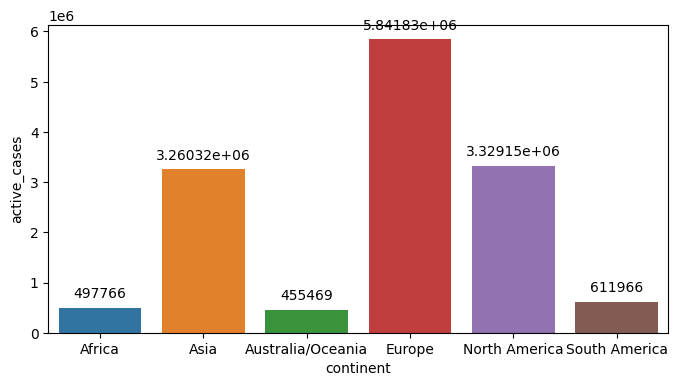

In [71]:
fig, ax = plt.subplots(figsize=(8, 4))
barchart = sns.barplot(x=act_cont['continent'], y=act_cont['active_cases'], ax=ax)

barchart.bar_label(ax.containers[0], label_type='edge', padding=5)

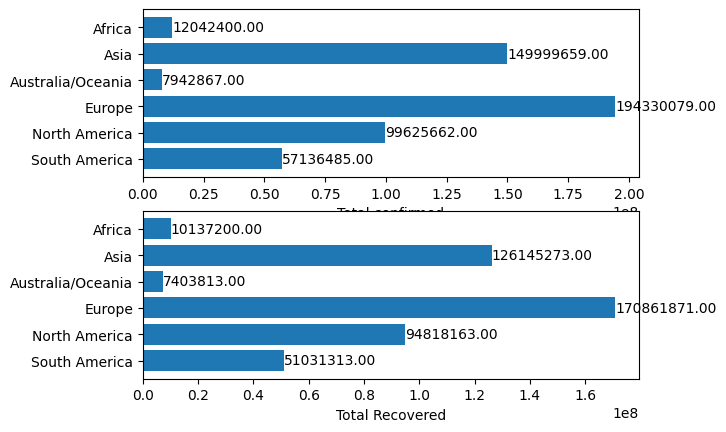

In [87]:
# Labels using bar_label
y_pos = np.arange(len(act_cont2['continent']))
error = np.random.rand(len(act_cont2['continent']))

fig, ax = plt.subplots(2)

hbars = ax[0].barh(y_pos, act_cont2['total_confirmed'], xerr=error, align='center')
ax[0].set_yticks(y_pos, labels=act_cont2['continent'])
ax[0].invert_yaxis()  # labels read top-to-bottom
ax[0].set_xlabel('Total confirmed')

# Label with specially formatted floats
ax[0].bar_label(hbars, fmt='%.2f')
#ax.set_xlim(right=15)  # adjust xlim to fit labels

hbars2 = ax[1].barh(y_pos, act_cont2['total_recovered'], xerr=error, align='center')
ax[1].set_yticks(y_pos, labels=act_cont2['continent'])
ax[1].invert_yaxis()
ax[1].set_xlabel('Total Recovered')
ax[1].bar_label(hbars2, fmt='%.2f')

plt.show()

In [97]:
#act_cont2.set_index('continent', inplace = True)
act_cont2.index

Index(['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America',
       'South America'],
      dtype='object', name='continent')

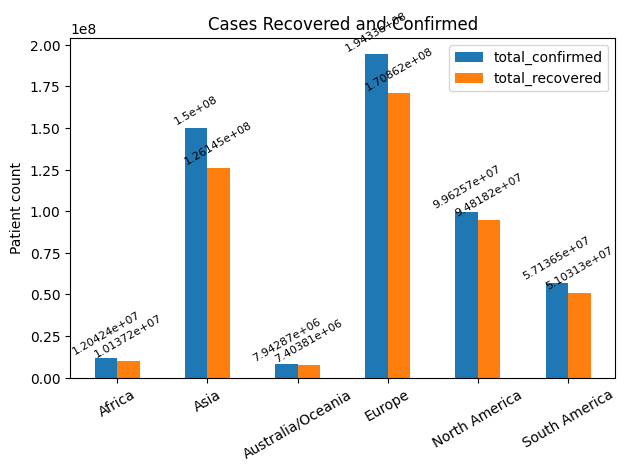

In [118]:
x = np.arange(len(act_cont2.continent))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for i, column in enumerate(act_cont2.columns[1:]):
    offset = width * multiplier
    rects = ax.bar(x + offset, act_cont2[column], width, label=column)
    ax.bar_label(rects, padding=1, fontsize = 8,  rotation=30)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Patient count')
ax.set_title('Cases Recovered and Confirmed')
ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(act_cont2['continent'], rotation = 30)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [40]:
df.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths',
       'quarter', 'month', 'weekday'],
      dtype='object')

In [28]:
sum_df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')